In [1]:
%load_ext autoreload
%autoreload 2

import functions_master as fm
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import statistics
import datetime as dt

In [2]:
metric = 'Close'

start_date = '2019-01-01'
end_date =  '2021-12-31'

raw_data = pd.read_csv("data/export.csv", parse_dates=True)
returns = fm.get_returns(raw_data)

fm.get_stats (returns, metric, start_date, end_date)

,CompanyName,PeriodStart,PeriodEnd,MonthsInPeriod,Volatility,AnnualizedVolatility,ReturnPerMonth,AnnualizedReturn
CompanyId,,,,,,,,
DSCV.XLON,DISCOVERIE GROUP PLC ORD 5P,2019-01,2021-12,36,0.027,0.094,0.029,0.409
GAW.XLON,GAMES WORKSHOP GROUP PLC ORD 5P,2019-01,2021-12,36,0.026,0.09,0.034,0.494
GHH.XLON,GOOCH & HOUSEGO PLC ORD 20P,2019-01,2021-12,36,0.028,0.097,0.001,0.012
ROL.XLON,ROTALA PLC ORD 25P,2019-01,2021-12,36,0.032,0.111,-0.012,-0.135
GWMO.XLON,GREAT WESTERN MINING CORPORATION PLC ORD EUR0....,2019-01,2021-12,36,0.067,0.232,-0.017,-0.186
IWG.XLON,IWG PLC ORD 1P,2020-06,2021-12,19,0.026,0.09,-0.002,-0.024
CNG.XLON,CHINA NONFERROUS GOLD LIMITED ORD USD0.0001 (DI),2019-01,2021-12,36,0.069,0.239,-0.006,-0.07
INS.XLON,INSTEM PLC ORD 10P,2019-01,2021-12,36,0.021,0.073,0.039,0.583
RENE.XLON,RENEURON GROUP PLC ORD 1P,2019-01,2021-12,36,0.053,0.184,0.014,0.182


<AxesSubplot:xlabel='Date'>

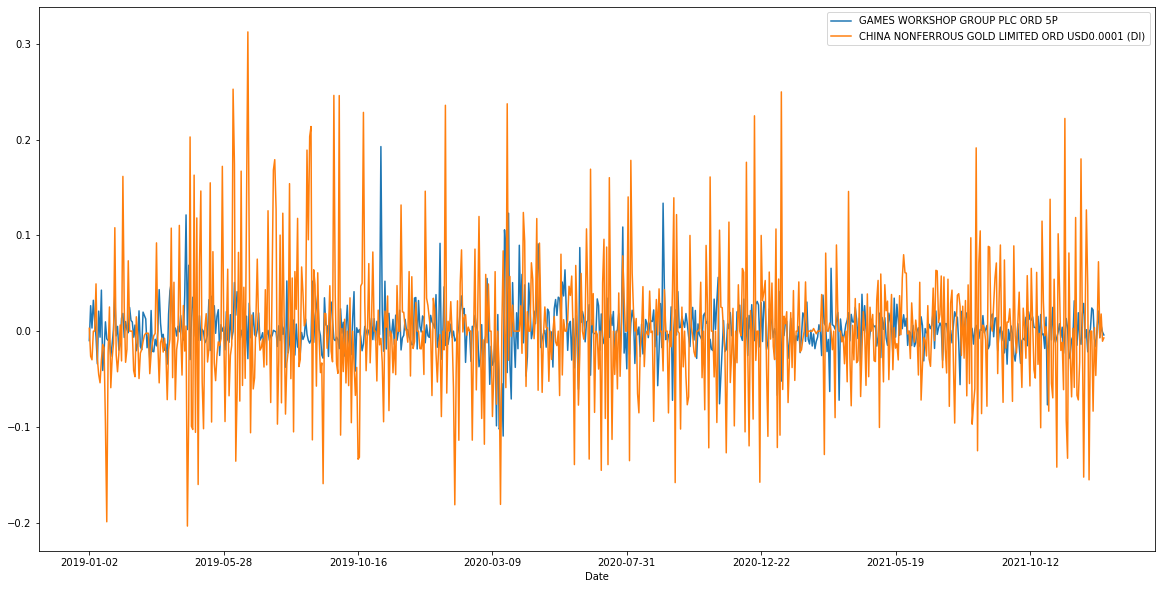

In [3]:
companies = ['GAW.XLON', 'CNG.XLON']

returns_multiple = fm.compare_returns (companies, raw_data, metric, start_date, end_date)
returns_multiple.plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

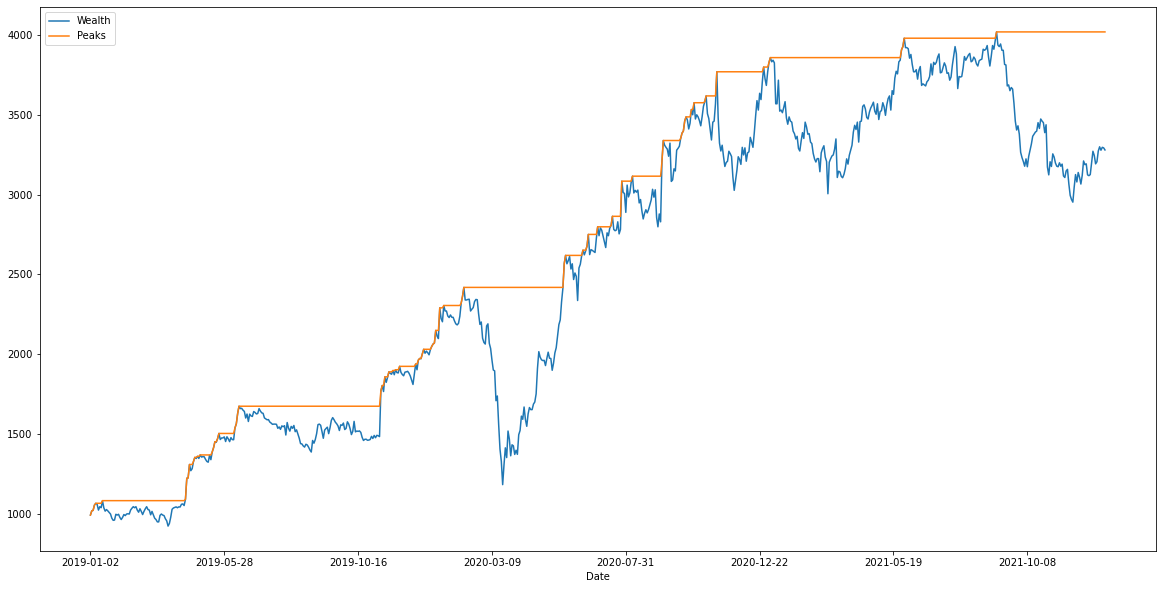

In [5]:
returns_1 = fm.get_returns_single_metric (companies[0], raw_data, start_date, end_date, metric)
fm.get_drawdown(returns_1)[['Wealth', 'Peaks']].plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

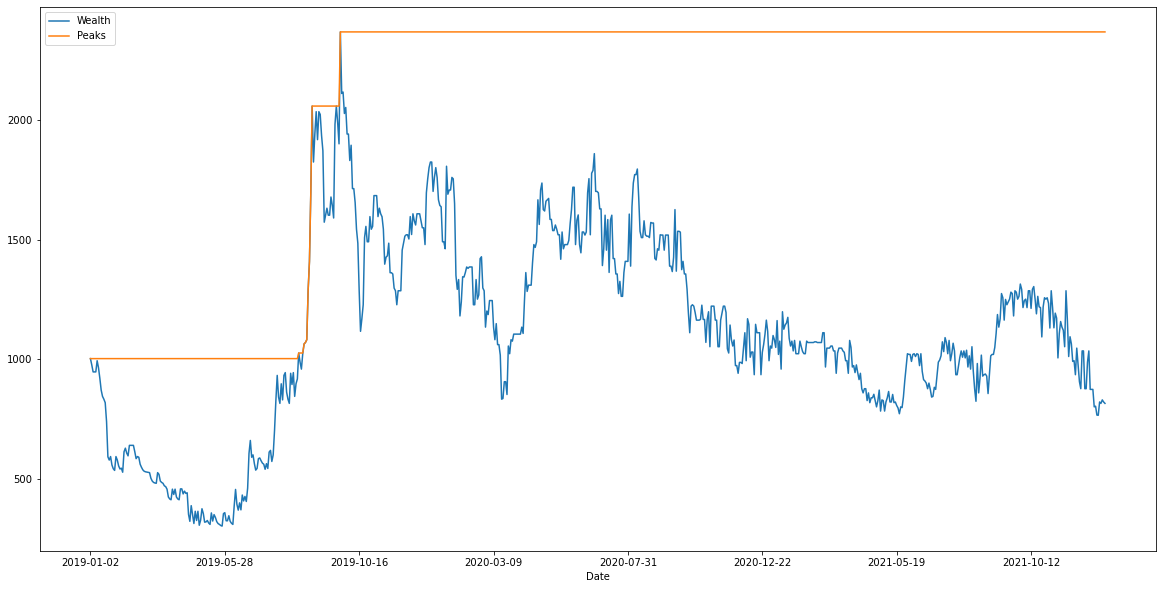

In [6]:
returns_2 = fm.get_returns_single_metric (companies[1], raw_data, start_date, end_date, metric)
fm.get_drawdown(returns_2)[['Wealth', 'Peaks']].plot(figsize=(20, 10))

array([[<AxesSubplot:title={'center':'GAMES WORKSHOP GROUP PLC ORD 5P'}>,
        <AxesSubplot:title={'center':'CHINA NONFERROUS GOLD LIMITED ORD USD0.0001 (DI)'}>]],
      dtype=object)

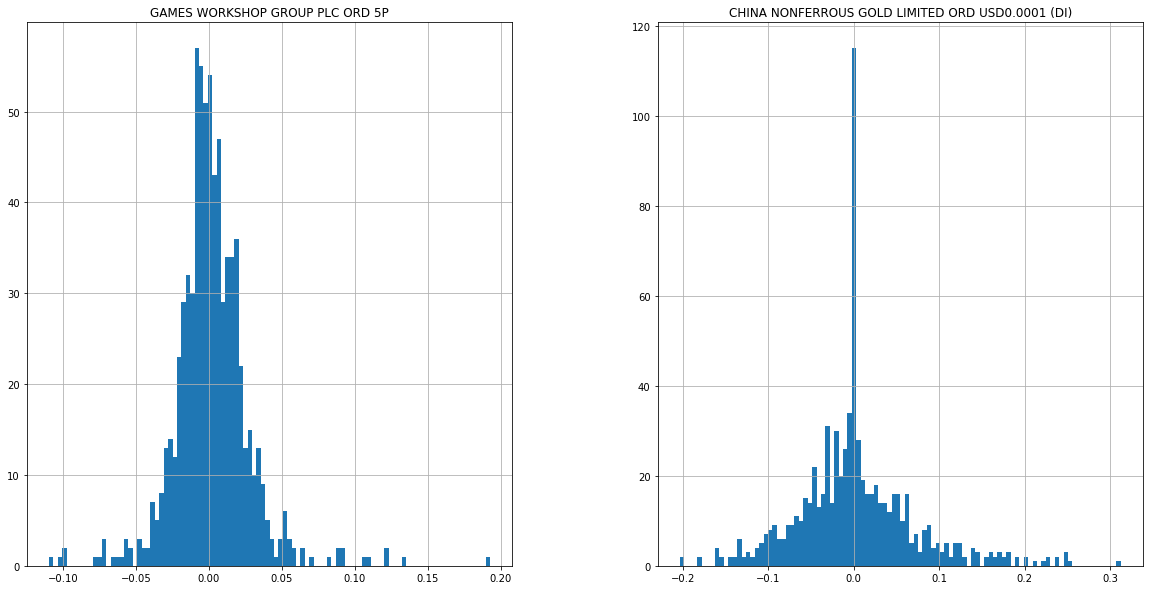

In [7]:
returns_multiple.hist(bins=100, figsize=(20, 10))